In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
# 1. Use the iris database to answer the following quesitons:

In [2]:
iris = sns.load_dataset('iris')

iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# 1. What does the distribution of petal lengths look like?

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

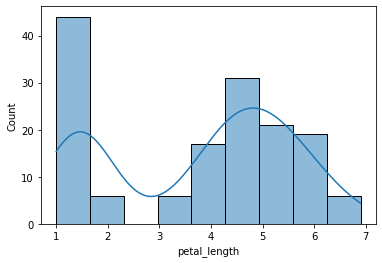

In [4]:
sns.histplot(iris.petal_length, kde = True)

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

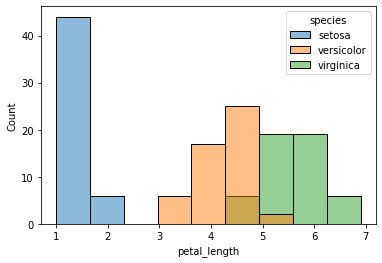

In [4]:
# = review
sns.histplot(data = iris, x = 'petal_length', hue = 'species')

In [ ]:
# 2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.

In [51]:
iris_corr = iris.corr()
iris_corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


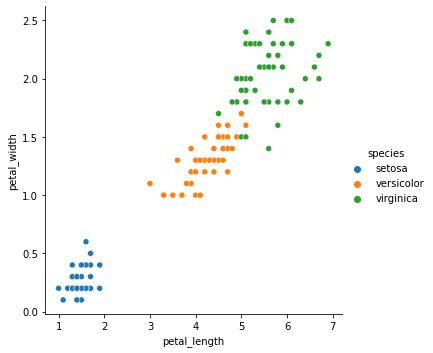

In [5]:
# review
sns.relplot(data = iris, x = 'petal_length', y = 'petal_width', hue = 'species')

In [ ]:
# 3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

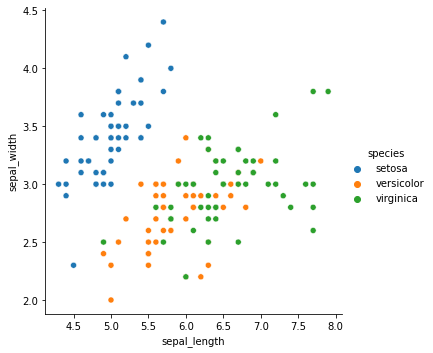

In [58]:
sns.relplot(data = iris, x = 'sepal_length', y = 'sepal_width', hue = 'species')

In [61]:
sepals_corr = pd.crosstab(iris.sepal_length, iris.sepal_width, normalize=True)

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

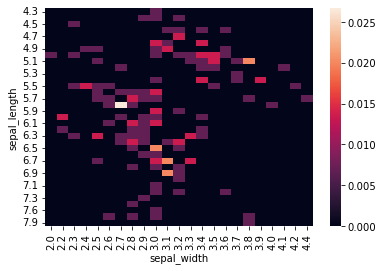

In [62]:
sns.heatmap(sepals_corr)

In [ ]:
# 4. Which features would be best used to predict species?

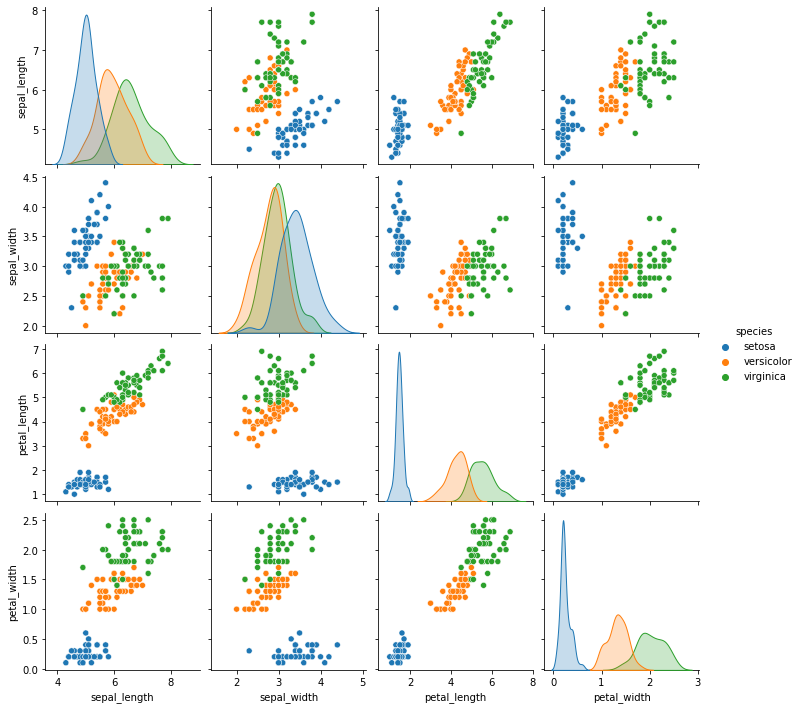

In [5]:
sns.pairplot(data = iris, hue = 'species')

In [ ]:
# 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

# Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [6]:
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [8]:
anscombe.groupby('dataset')[['x', 'y']].agg(['mean', 'median', 'std'])

x                          y                 
        mean median       std      mean median       std
dataset                                                 
I        9.0    9.0  3.316625  7.500909   7.58  2.031568
II       9.0    9.0  3.316625  7.500909   8.14  2.031657
III      9.0    9.0  3.316625  7.500000   7.11  2.030424
IV       9.0    8.0  3.316625  7.500909   7.04  2.030579

In [10]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [69]:
anscombe.columns

Index(['dataset', 'x', 'y'], dtype='object')

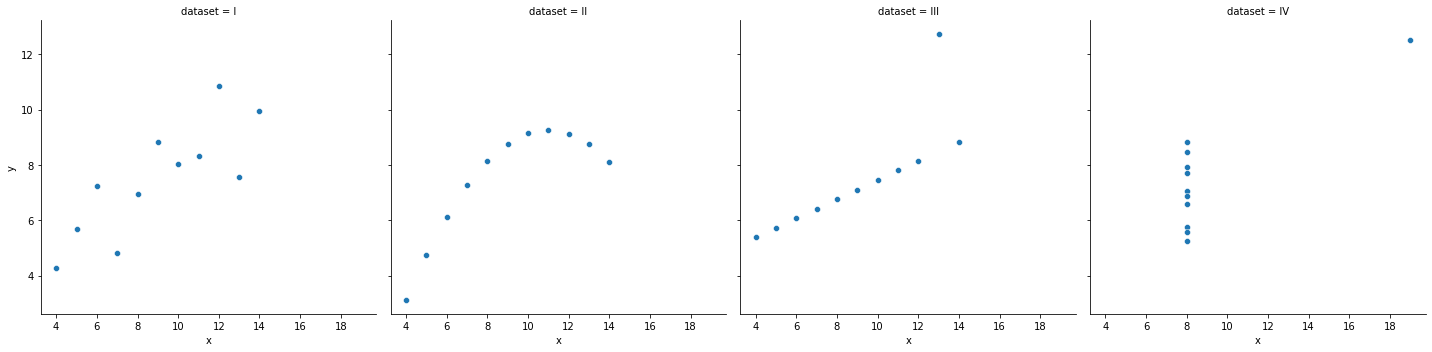

In [70]:
sns.relplot(data = anscombe, x = 'x', y = 'y', col = 'dataset')

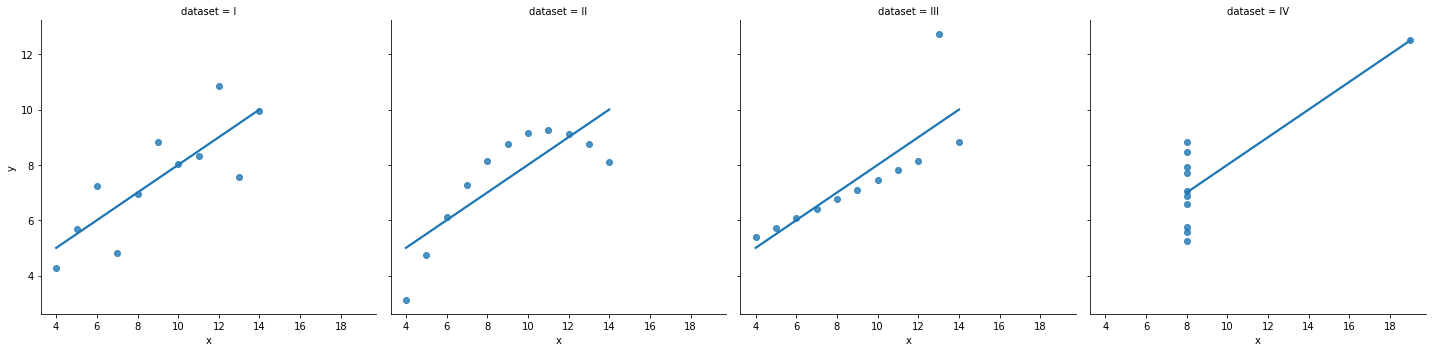

In [12]:
sns.lmplot(data = anscombe, x = 'x', y = 'y', col = 'dataset', ci = 0)

In [ ]:
# 2.Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [13]:
from pydataset import data

InsectSprays = data('InsectSprays')
InsectSprays = data("InsectSprays",show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [ ]:
insect_sprays = data("InsectSprays")
insect_sprays.info()

In [76]:
insect_sprays.columns

Index(['count', 'spray'], dtype='object')

<AxesSubplot:xlabel='spray', ylabel='count'>

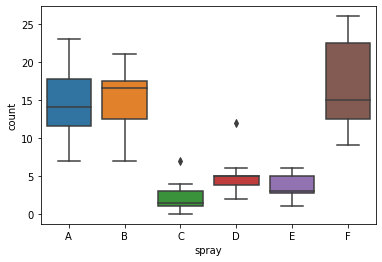

In [77]:
sns.boxplot(data=insect_sprays,y="count",x="spray")

In [ ]:
# 3.Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

In [15]:
swiss = data('swiss')
swiss = swiss.sort_values(by='Catholic')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
La Vallee,54.3,15.2,31,20,2.15,10.8
Aubonne,66.9,67.5,14,7,2.27,19.1
Oron,72.5,71.2,12,1,2.40,21.0
Paysd'enhaut,72.0,63.5,6,3,2.56,18.0
Cossonay,61.7,69.3,22,5,2.82,18.7


In [17]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, La Vallee to Herens
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [18]:
data('swiss',show_doc = True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [ ]:
# Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [16]:
swiss['is_catholic'] = swiss.Catholic > 50
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
La Vallee,54.3,15.2,31,20,2.15,10.8,False
Aubonne,66.9,67.5,14,7,2.27,19.1,False
Oron,72.5,71.2,12,1,2.40,21.0,False
Paysd'enhaut,72.0,63.5,6,3,2.56,18.0,False
Cossonay,61.7,69.3,22,5,2.82,18.7,False


In [ ]:
# Does whether or not a province is Catholic influence fertility?

<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

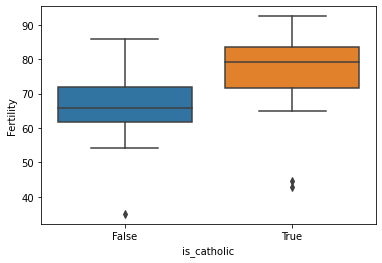

In [21]:
sns.boxplot(x = 'is_catholic', y = 'Fertility', data = swiss)

In [22]:
swiss.groupby('is_catholic').Fertility.mean()

is_catholic
False    66.220690
True     76.461111
Name: Fertility, dtype: float64

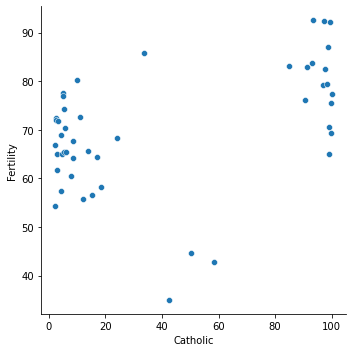

In [104]:
sns.relplot(data = swiss, x='Catholic', y='Fertility')

In [ ]:
# What measure correlates most strongly with fertility?

In [24]:
swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.402813
Name: Fertility, dtype: float64

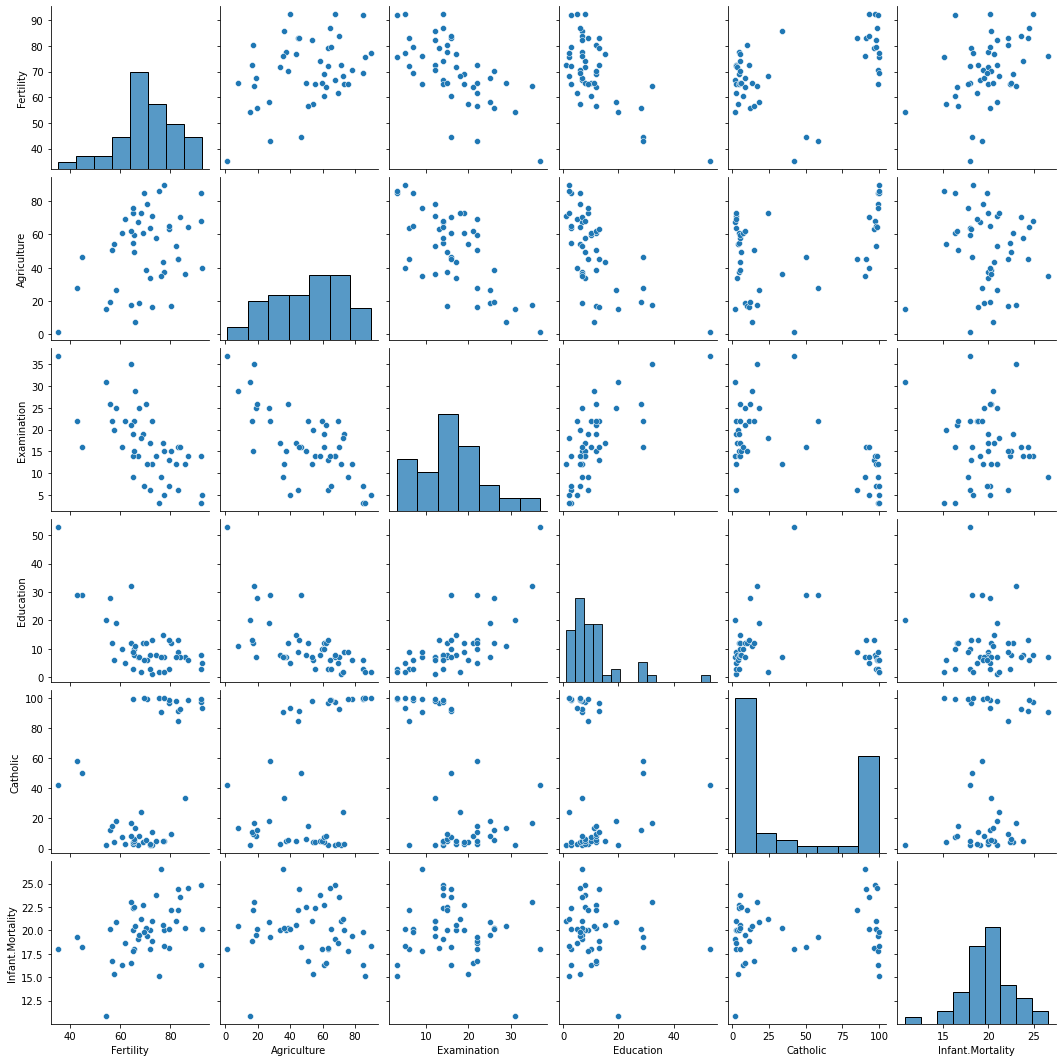

In [17]:
sns.pairplot(data = swiss.iloc[:, :-1])

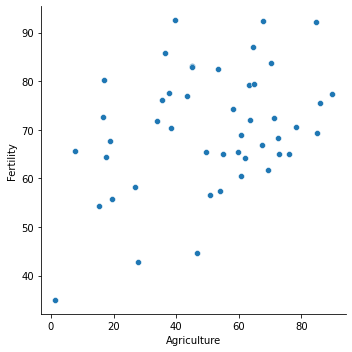

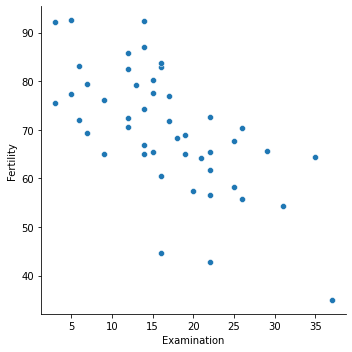

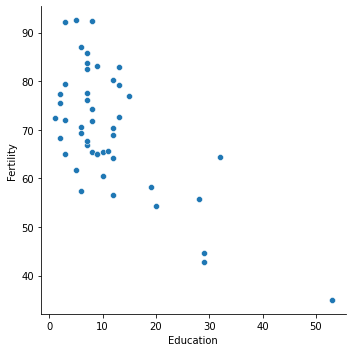

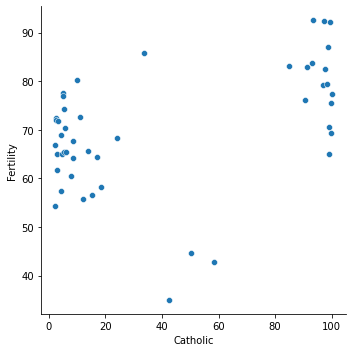

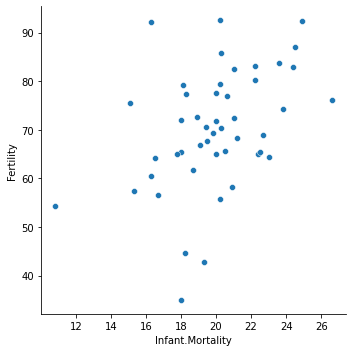

In [18]:
# We can also make individual plots

for col in swiss.columns[1:-1]:
    sns.relplot(data = swiss, y = 'Fertility', x = col)

In [ ]:
# 4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [23]:
def get_db_url(db):
    from env import username, password, host
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'


In [28]:
url = get_db_url('chipotle')
query = "SELECT * FROM orders"
orders = pd.read_sql(query, url)
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [29]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4622 non-null   int64 
 1   order_id            4622 non-null   int64 
 2   quantity            4622 non-null   int64 
 3   item_name           4622 non-null   object
 4   choice_description  4622 non-null   object
 5   item_price          4622 non-null   object
dtypes: int64(3), object(3)
memory usage: 216.8+ KB


In [35]:
# Convert the item_price column into a float

orders['item_price'] = orders.item_price.replace('$','').astype('float')
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98


In [36]:
best_sellers = orders.groupby('item_name').quantity.sum().nlargest(4)
best_sellers

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [37]:
best_sellers.index

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito'],
      dtype='object', name='item_name')

In [38]:
orders[orders.item_name.isin(best_sellers.index)]

,id,order_id,quantity,item_name,choice_description,item_price
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
5,6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",10.98
7,8,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour...",11.75
9,10,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",9.25
10,11,5,1,Chips and Guacamole,nan,4.45
...,...,...,...,...,...,...
4607,4608,1829,1,Steak Burrito,"[Tomatillo Green Chili Salsa, [Rice, Cheese, Sour Cream, Guacamole]]",11.75
4610,4611,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4616,4617,1832,1,Chips and Guacamole,nan,4.45
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75


In [39]:
# revenue produced by 4 highest selling items.

revenue = orders[orders.item_name.isin(best_sellers.index)].groupby('item_name').item_price.sum()
revenue

item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Chips and Guacamole    2201.04
Steak Burrito          3851.43
Name: item_price, dtype: float64

In [40]:
revenue = revenue.sort_values(ascending = False).reset_index()
revenue

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Chips and Guacamole,2201.04


Text(0.5, 0, 'Gross Revenue')

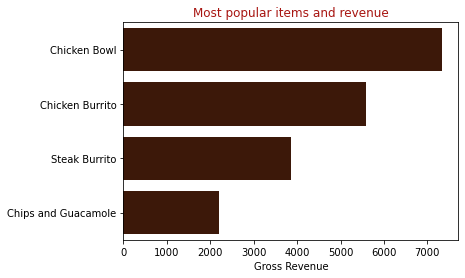

In [41]:
sns.barplot(y = 'item_name',
            x = 'item_price',
            data = revenue,
            palette=['#451400'])

plt.title('Most popular items and revenue', fontdict={'color': '#a81612'})

plt.ylabel("") # to remove the column_name
plt.xlabel("Gross Revenue")

In [ ]:
# 5. 5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [43]:
sleepstudy = data('sleepstudy')
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [44]:
sleepstudy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [46]:
sleepstudy['Subject'] = 'Subject_' + sleepstudy.Subject.astype(str) 
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,Subject_Subject_308
2,258.7047,1,Subject_Subject_308
3,250.8006,2,Subject_Subject_308
4,321.4398,3,Subject_Subject_308
5,356.8519,4,Subject_Subject_308


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

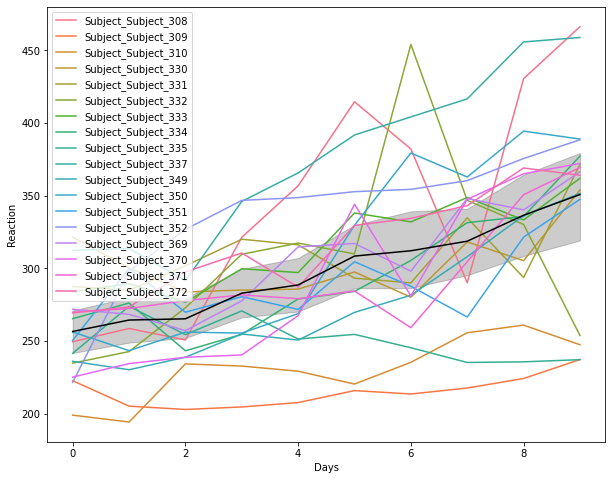

In [47]:
plt.figure(figsize=(10, 8))

sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction',  hue = 'Subject')
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'black')